# SIMULACIÓN | LABORATORIO 5


## Boostrap o remuestreo

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display, Math
import ipywidgets as widgets
import random
import scipy.stats as stats
import statistics

### Ejercicio 1
En un estudio sobre plantaciones de coihue, se ha recopilado información sobre la altura que alcanzan dichos árboles a los 20 años de edad, en diversas zonas de la región sur austral de Chile. A partir de dichos datos, estamos interesados en calcular un intervalo de confianza para la $mediana$ de altura que alcanza esta especie a los 20 años de edad.
Para ello utilizaremos remuestreo o bootstrap.
1. Analice el código y evalue el número de muestras de bootstrap para alcanzar convergencia de la varianza estimada de la mediana.
2. Calcule el error cuadrático medio de la mediana.
3. Escoja otro estadístico de la muestra y calcule su incerteza con la técnica de boostrap
4. Compare y comente sus resultados.

In [3]:
datos = [12.5,11.4,18.4,10.7,9.5,11.7,15.4,12.3,18.6, 14.7, 10.7,11.6, 10.1, 8.2, 11.4,21.1, 12.1, 7.5, 12.5, 14.7, 10.3, 5.4, 9.4, 13.8, 9.6, 11.3, 14.8, 12.6]
n=len(datos)

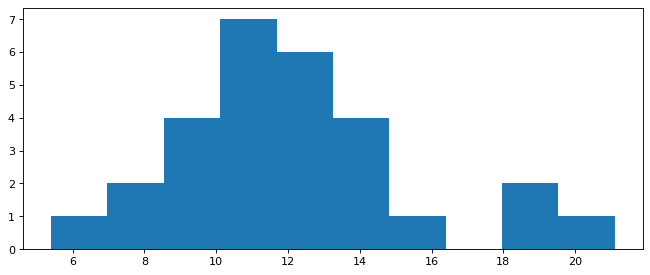

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=80)
ax.hist(datos)
plt.show()

In [201]:
#mediana del conjunto de datos inicial
m = statistics.median(datos)
print(m)

#operadores en generacion de submuestras para B
b=2500
step=15
rng1 = list(range(50,b,step))


mn = []
int_conf = []
error_var = []
mse = []
index = 0

#iterador generador de submuestras para rng1={B0,B1.....BN}
for item in rng1:
    mn=[]
    mediana = 0
    var_t = 0
    sum_mse = 0
    
    #iterador en la obtencion de muestras BN
    for j in range(item):
        dat = np.random.choice(list(datos),size=n,replace=True) #se generan las muestras de reemplazo
        mn.append(statistics.median(dat)) #se capturan las medias de cada muestra de reemplazo    
        
    #varianza empírica
    var = statistics.variance(mn)
    #estimador del intervalo de confianza
    int_conf.append(1.96*math.sqrt(var))
    
    #varianza teórica y error cuadrático medio
    mediana = sum(mn)/item
    for i in range(item):
        var_t += math.pow(mn[i]-mediana,2) #suma para varianza teórica
        sum_mse += math.pow(mn[i]-m,2) #suma de error cuadrático medio
    var_t = var_t/(item-1) #cálculo de varianza teórica
    mse.append(sum_mse/item) #cálculo de error cuadrático medio
    
    #cálculo de error en la varianza
    err = abs(var-var_t)/abs(var)
    error_var.append(err)
    
    if(err<5*math.pow(10,-16.5) and err!=0.0):
        index = item
        break

ln = len(error_var)
print(f"Error alcanzado {error_var[ln-1]}")
print(f"Se alcanza una aproximación en {index} subparticiones")
print(f"Con varianza estimada {var_t}, y varianza teórica de {var}")
ln = len(mse)
print(f"Estimación de error medio cuadrático {mse[ln-1]}")
print(f"Su intervalo de confianza será:")
display(Math('%0.2f \pm %0.2f' % (m, 1.96*math.sqrt(var) )))

11.649999999999999
Error alcanzado 1.388859696222515e-16
Se alcanza una aproximación en 95 subparticiones
Con varianza estimada 0.19984434490481523, y varianza teórica de 0.1998443449048152
Estimación de error medio cuadrático 0.21102631578947398
Su intervalo de confianza será:


<IPython.core.display.Math object>

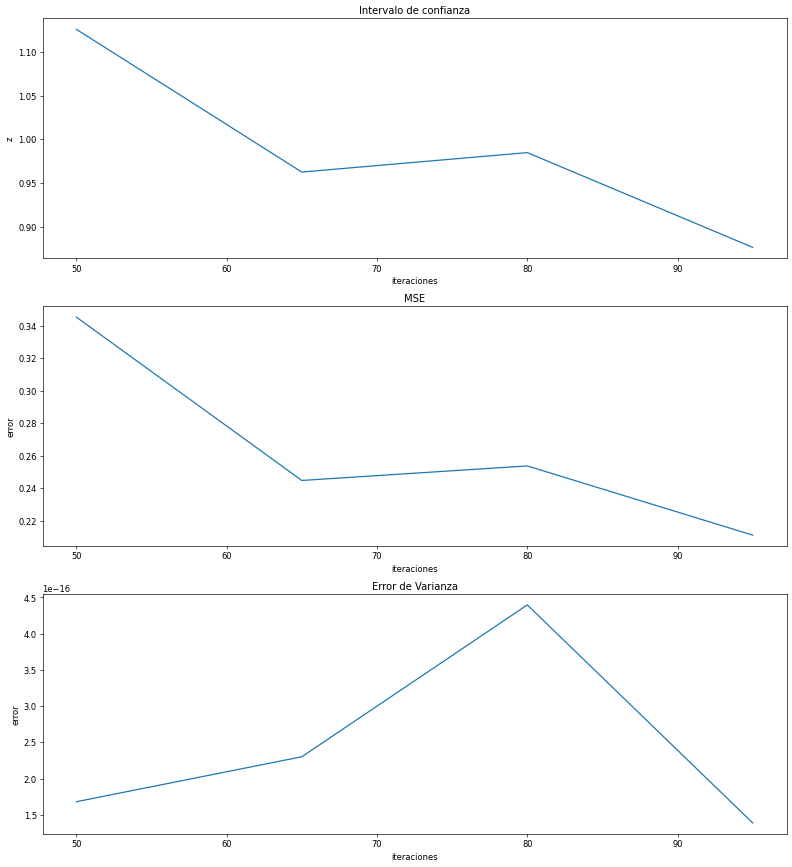

In [204]:
fig, ax = plt.subplots(3, 1, figsize=(16, 18), dpi=60)
dm = list(range(50,index+step,step))
ax[0].plot(dm,int_conf)
ax[0].set_title("Intervalo de confianza")
ax[0].set(xlabel='iteraciones', ylabel='z')

ax[1].set_title("MSE")
ax[1].set(xlabel='iteraciones', ylabel='error')
ax[1].plot(dm,mse)

ax[2].set_title("Error de Varianza")
ax[2].set(xlabel='iteraciones', ylabel='error')
ax[2].plot(dm,error_var)

plt.show()

In [35]:
m = statistics.stdev(datos)
print(m)
b=2500
step=10
rng1 =  list(range(50,b,step))

mm = 0
mn =[]
bkn=[]
for i in rng1:
    mn=[]
    for i in range(i):
        dat = np.random.choice(list(datos),size=n,replace=True)
        mn.append(statistics.stdev(dat))
    var = statistics.variance(mn)
    bkn.append(1.96*math.sqrt(var))

var = statistics.variance(mn)
print(var)
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (m, rango )))

3.401810520122309
0.2710669913672326


<IPython.core.display.Math object>

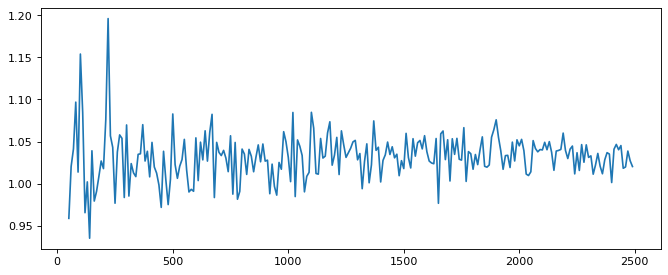

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=80)
rng2 = np.array(range(50,b))
ax.plot(rng1,bkn)
plt.show()

### Ejercicio 2

Suponga que los datos previamente registrados provienen de una distribución normal de parámetros $(\mu,\sigma)$

1. Calcule los estimadores máximo verosímil de $\hat{\mu}$ y $\hat{\sigma}$
2. Utilice boostrap paramétrico para estimar la incerteza de $\hat{\mu}$ y $\hat{\sigma}$ . Estime el número de muestras para alcanzar convergencia en cada caso.
3. Compare y comente sus resultados.

